In [2]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
# from imblearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [25]:
#Traditional

#ler csv

# -away
ager = pd.read_csv("analitics/traditional_Germany_away.csv")
aita = pd.read_csv("analitics/traditional_Italy_away.csv")
aeng = pd.read_csv("analitics/traditional_England_away.csv")
afra = pd.read_csv("analitics/traditional_France_away.csv")
aspa = pd.read_csv("analitics/traditional_Spain_away.csv")
aeur = pd.read_csv("analitics/traditional_European_Championship_away.csv")
acup = pd.read_csv("analitics/traditional_World_Cup_away.csv")

# -home
hger  = pd.read_csv("analitics/traditional_Germany_home.csv")
hita  = pd.read_csv("analitics/traditional_Italy_home.csv")
heng  = pd.read_csv("analitics/traditional_England_home.csv")
hfra  = pd.read_csv("analitics/traditional_France_home.csv")
hspa  = pd.read_csv("analitics/traditional_Spain_home.csv")
heur  = pd.read_csv("analitics/traditional_European_Championship_home.csv")
hcup  = pd.read_csv("analitics/traditional_World_Cup_home.csv")



In [26]:
#merge dfs
aspa.head()

,matchID,team1_ID,team2_ID,date,tournament,gk_saves_T2,red_card_T2,yellow_card_T2,assists_T2,shots_T2,shots_against_T2,shots_on_target_T2,passes_T2,goals_T2,goals_against_T2,ball_possession_T2,pass_acc_T2,gk_acc_T2,shot_acc_T2
0,2565922,676,687,"May 20, 2018 at 8:45:00 PM GMT+2",Spain,3.0,0.0,2.0,0.0,13,11,2.0,308,0.0,1.0,0.365362,0.855556,0.750000,0.153846
1,2565919,678,691,"May 20, 2018 at 4:15:00 PM GMT+2",Spain,3.0,0.0,1.0,1.0,12,10,4.0,327,1.0,0.0,0.434263,0.803440,1.000000,0.333333
2,2565924,674,677,"May 20, 2018 at 12:00:00 PM GMT+2",Spain,3.0,0.0,0.0,1.0,11,21,6.0,350,1.0,2.0,0.413223,0.833333,0.600000,0.545455
3,2565920,680,696,"May 19, 2018 at 6:30:00 PM GMT+2",Spain,8.0,0.0,2.0,0.0,8,19,2.0,292,0.0,1.0,0.350962,0.808864,0.888889,0.250000
4,2565921,683,698,"May 19, 2018 at 6:30:00 PM GMT+2",Spain,2.0,0.0,1.0,0.0,10,6,3.0,334,1.0,0.0,0.647287,0.787736,1.000000,0.300000


In [6]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.drop(cols, axis=1)
    group = group.dropna(subset=new_cols)

    return group

In [27]:
cols = ['gk_saves_T1', 'red_card_T1', 'yellow_card_T1',	'assists_T1', 'shots_T1', 'shots_against_T1', 'shots_on_target_T1', 
        'passes_T1', 'goals_T1', 'goals_against_T1', 'ball_possession_T1', 'pass_acc_T1', 'gk_acc_T1', 'shot_acc_T1']
new_cols = [f"avg_{c}" for c in cols]

heng = heng.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heng = heng.droplevel('team1_ID')
hger = hger.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hger = hger.droplevel('team1_ID')
hita = hita.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hita = hita.droplevel('team1_ID')
hfra = hfra.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hfra = hfra.droplevel('team1_ID')
hspa = hspa.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hspa = hspa.droplevel('team1_ID')
heur = heur.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heur = heur.droplevel('team1_ID')
hcup = hcup.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hcup = hcup.droplevel('team1_ID')

In [28]:
cols = ['gk_saves_T2', 'red_card_T2', 'yellow_card_T2',	'assists_T2', 'shots_T2', 'shots_against_T2', 'shots_on_target_T2', 
        'passes_T2', 'goals_T2', 'goals_against_T2', 'ball_possession_T2', 'pass_acc_T2', 'gk_acc_T2', 'shot_acc_T2']
new_cols = [f"avg_{c}" for c in cols]

aeng = aeng.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeng = aeng.droplevel('team2_ID')
ager = ager.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
ager = ager.droplevel('team2_ID')
aita = aita.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aita = aita.droplevel('team2_ID')
afra = afra.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
afra = afra.droplevel('team2_ID')
aspa = aspa.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aspa = aspa.droplevel('team2_ID')
aeur = aeur.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeur = aeur.droplevel('team2_ID')
acup = acup.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
acup = acup.droplevel('team2_ID')

In [29]:
avg_ger = hger.merge(ager, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_ita = hita.merge(aita, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eng = heng.merge(aeng, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_fra = hfra.merge(afra, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_spa = hspa.merge(aspa, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eur = heur.merge(aeur, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_cup = hcup.merge(acup, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])


In [30]:
avg_ger.to_csv('rolling_avg/stats_avg_ger.csv', encoding='utf-8', index=False)
avg_ita.to_csv('rolling_avg/stats_avg_ita.csv', encoding='utf-8', index=False)
avg_eng.to_csv('rolling_avg/stats_avg_eng.csv', encoding='utf-8', index=False)
avg_fra.to_csv('rolling_avg/stats_avg_fra.csv', encoding='utf-8', index=False)
avg_spa.to_csv('rolling_avg/stats_avg_spa.csv', encoding='utf-8', index=False)
avg_eur.to_csv('rolling_avg/stats_avg_eur.csv', encoding='utf-8', index=False)
avg_cup.to_csv('rolling_avg/stats_avg_cup.csv', encoding='utf-8', index=False)

In [31]:
avg_df = pd.concat([avg_ger, avg_ita, avg_eng, avg_fra, avg_spa, avg_eur, avg_cup], ignore_index=True)

In [32]:
avg_df.groupby('tournament').count()

,matchID,team1_ID,team2_ID,date,winner,avg_gk_saves_T1,avg_red_card_T1,avg_yellow_card_T1,avg_assists_T1,avg_shots_T1,avg_shots_against_T1,avg_shots_on_target_T1,avg_passes_T1,avg_goals_T1,avg_goals_against_T1,avg_ball_possession_T1,avg_pass_acc_T1,avg_gk_acc_T1,avg_shot_acc_T1,avg_gk_saves_T2,avg_red_card_T2,avg_yellow_card_T2,avg_assists_T2,avg_shots_T2,avg_shots_against_T2,avg_shots_on_target_T2,avg_passes_T2,avg_goals_T2,avg_goals_against_T2,avg_ball_possession_T2,avg_pass_acc_T2,avg_gk_acc_T2,avg_shot_acc_T2
tournament,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
England,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207
France,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
Germany,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159
Italy,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
Spain,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
World_Cup,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [45]:
#Separando dados e target
X = avg_df.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_df['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(XScaled,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)


In [34]:
#Métricas de avaliação
def evaluation_metrics(clf,test_x, test_y, pred_y, ax_1, ax_2):
    accuracy = accuracy_score(test_y, pred_y)
    precision = precision_score(test_y, pred_y)
    recall = recall_score(test_y, pred_y)
    f1 = f1_score(test_y, pred_y)
        
    plot_precision_recall_curve(clf, test_x, test_y, ax=ax_1)
    plot_roc_curve(clf, test_x, test_y, ax=ax_2)
    
    return accuracy, precision, recall, f1

In [35]:
def testa_modelos(train_x, train_y, test_x, test_y):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

    for clf, name in [(rf, 'RandomForest'),
                      (logi, 'LogisticRegression'),
                      (xgb, 'XGBClassifier')]:
        
        clf.fit(train_x, train_y)
        y_pred = clf.predict(test_x)

        accuracy, precision, recall, f1 = evaluation_metrics(clf, test_x, test_y, y_pred, ax1, ax2)
        print(f"{name}: accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
    
    ax1.legend(loc="right")
    ax1.set_title('Precision-Recall curve')
    
    ax2.legend(loc="right")
    ax2.set_title('ROC AUC curve')

In [36]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    random_state=42,
    class_weight='balanced',
    n_jobs = -1)

logi = LogisticRegression(
    penalty='l2', 
    solver='liblinear', 
    max_iter=100, 
    class_weight='balanced')

xgb = XGBClassifier(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    scale_pos_weight=10)

RandomForest: accuracy: 65.80% | precision: 71.13% | recall: 73.80% | f1: 72.44%
LogisticRegression: accuracy: 64.50% | precision: 73.49% | recall: 65.24% | f1: 69.12%
XGBClassifier: accuracy: 66.45% | precision: 65.67% | recall: 94.12% | f1: 77.36%


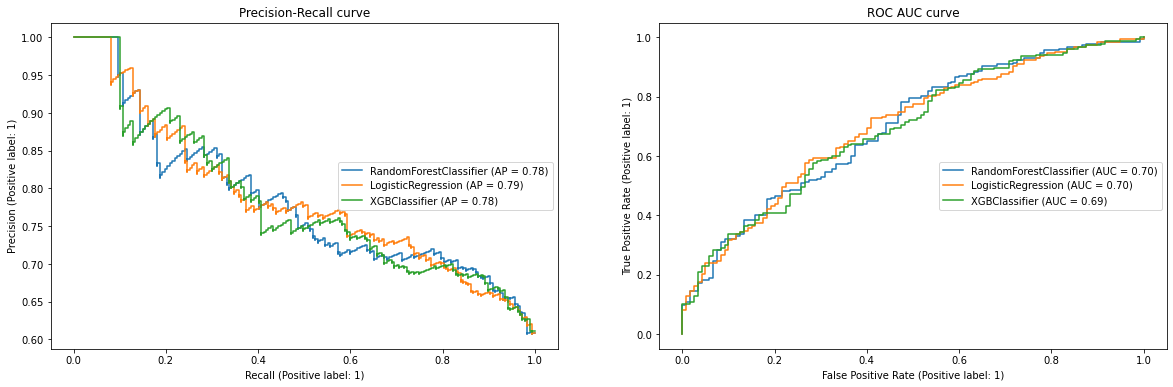

In [37]:
testa_modelos(X_train, y_train, X_test, y_test)

In [38]:
#Achando melhores hiperparâmetros com hyperopt para logistic regression
           
#Define Parameter Space for Optimization
space = {
    'C': hp.choice('C', [0.001, 0.01, 0.1, 1, 10, 100, 1000]),
    'penalty': hp.choice('penalty', ['l1']),
    'max_iter': hp.quniform('max_iter', 100, 700, 100),
    'solver': hp.choice('solver', ['liblinear', 'saga']), #tirei 'lbfgs' e'sag' pq não funciona com l1
    'class_weight' : hp.choice('class_weight', ['balanced', None])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    clf = LogisticRegression(**params, random_state=42, n_jobs=-1)
    f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy', error_score='raise').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 10/10 [00:17<00:00,  1.75s/trial, best loss: -0.7002659312518468]
Best: {'C': 2, 'class_weight': 1, 'max_iter': 500.0, 'penalty': 0, 'solver': 0}


In [46]:
#Achando melhores hiperparâmetros com hyperopt para Random Forest

#Define Parameter Space for Optimization
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500]),
    "max_depth": hp.quniform("max_depth", 2, 24, 2),
    "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
    "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
    "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
    "bootstrap": hp.choice("bootstrap", [True, False])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    model = RandomForestClassifier(**params, n_jobs=-1)
    f1 = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy', error_score='raise').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 10/10 [00:23<00:00,  2.30s/trial, best loss: -0.6751600512163893]
Best: {'bootstrap': 1, 'class_weight': 2, 'criterion': 0, 'max_depth': 4.0, 'max_features': 2, 'min_samples_leaf': 0, 'min_samples_split': 4, 'n_estimators': 4}


In [47]:
#Achando melhores hiperparâmetros com hyperopt para XGBoosting

#Define Parameter Space for Optimization
space = {
 'max_depth' : hp.choice('max_depth', range(5, 15, 1)),
 'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
 'n_estimators' : hp.choice('n_estimators', range(50, 400, 10)),
 'gamma' : hp.quniform('gamma', 0, 0.30, 0.01),
 'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
 'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
 'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
 'scale_pos_weight' : hp.choice('scale_pos_weight', range(4, 25, 1)),
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    clf = XGBClassifier(**params, random_state=42, verbosity=0, objective= 'binary:logistic', n_jobs=-1)
    f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 10/10 [00:07<00:00,  1.26trial/s, best loss: -0.6555402344134739]
Best: {'colsample_bytree': 0.42, 'gamma': 0.12, 'learning_rate': 0.31, 'max_depth': 2, 'min_child_weight': 6.0, 'n_estimators': 23, 'scale_pos_weight': 7, 'subsample': 0.75}


CrossValMean: 0.6372993203979119
CrossValSTD: 0.02496222909390716
accuracy: 65.80% | precision: 68.81% | recall: 80.21% | f1: 74.07%


Text(0.5, 1.0, 'ROC AUC curve')

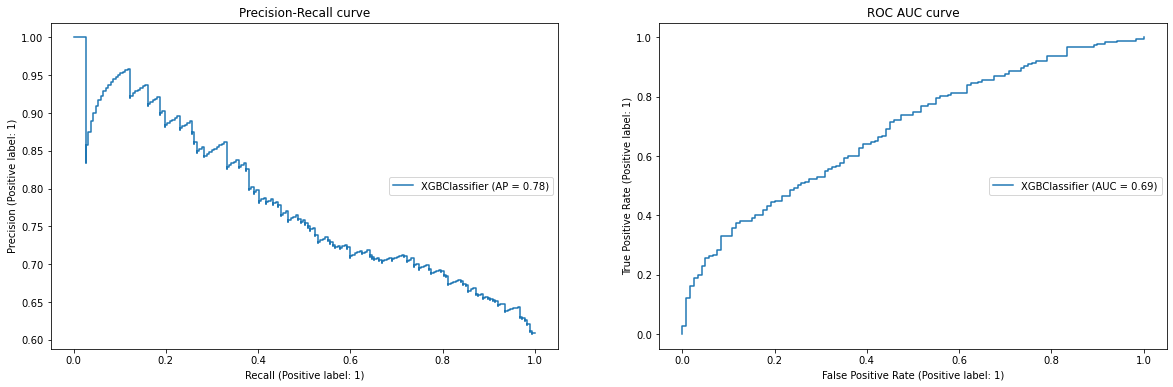

In [48]:
# clf = rf = RandomForestClassifier(
#     n_estimators=300,
#     max_depth=6,
#     random_state=42,
#     class_weight='balanced',
#     n_jobs = -1)


clf = XGBClassifier(
    learning_rate=best['learning_rate'],
    n_estimators=range(50, 400, 10)[best['n_estimators']],
    max_depth=range(5, 15, 1)[best['max_depth']],
    min_child_weight=best['min_child_weight'],
    gamma=best['gamma'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    objective= 'binary:logistic',
    scale_pos_weight=range(4, 25, 1)[best['scale_pos_weight']])

cv = cross_val_score(clf,X_train,y_train, cv = 5 , scoring='accuracy')

CrossValMean = cv.mean()
print("CrossValMean:", CrossValMean)
CrossValSTD = cv.std()
print("CrossValSTD:", CrossValSTD)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
accuracy, precision, recall, f1 = evaluation_metrics(clf, X_test ,y_test, y_pred, ax1, ax2)
print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
ax1.legend(loc="right")
ax1.set_title('Precision-Recall curve')

ax2.legend(loc="right")
ax2.set_title('ROC AUC curve')